In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
dados = pd.read_csv("/content/sample_data/train.csv")

In [ ]:
dados

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
dados.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print(dados.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
valores_nulos = dados.isnull().sum()
print(dados.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
dados = dados.drop(columns = ['PassengerId','Name','Ticket','Cabin'])

In [ ]:
valores_nulos = dados.isnull().sum()
print(dados.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [ ]:
dados['Family'] = dados['Parch'] + dados['SibSp']
dados.drop(columns = ['Parch','SibSp'],inplace =True)

In [ ]:
Sex_dic = {
    "male":0,
    "female":1
}
dados["Sex"] = dados["Sex"].map(Sex_dic)

Pclass_dic={
    1:"Upper",
    2:"Middle",
    3:"Lower"
}
dados["Pclass"] = dados["Pclass"].map(Pclass_dic)

In [ ]:
dados.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family'], dtype='object')

In [ ]:
dados

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,Lower,0,22.0,7.2500,S,1
1,1,Upper,1,38.0,71.2833,C,1
2,1,Lower,1,26.0,7.9250,S,0
3,1,Upper,1,35.0,53.1000,S,1
4,0,Lower,0,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,Middle,0,27.0,13.0000,S,0
887,1,Upper,1,19.0,30.0000,S,0
888,0,Lower,1,NaN,23.4500,S,3
889,1,Upper,0,26.0,30.0000,C,0


In [ ]:
Man_Na = dados.loc[(dados['Age'].isnull()) & (dados.Sex==0)]
Woman_Na = dados.loc[(dados['Age'].isnull()) & (dados.Sex==1)]
Qtd_Man = Man_Na.shape[0]
Qtd_woman = Woman_Na.shape[0]
print(f"{Qtd_Man} {Qtd_woman}")

124 53


In [ ]:
man_mean = dados.loc[(dados.Sex==0)].Age.mean()
woman_mean = dados.loc[(dados.Sex==1)].Age.mean()
print(f"{man_mean} {woman_mean}")

30.72664459161148 27.915708812260537


In [ ]:
# Calcular a média dos valores não nulos na coluna 'Age'
media_idade = dados['Age'].mean()

# Preencher os valores NaN na coluna 'Age' com a média calculada
dados.loc[(dados['Age'].isna()) & (dados['Sex']==0), 'Age'] = math.trunc(man_mean)
dados.loc[(dados['Age'].isna()) & (dados['Sex']==1) , 'Age'] = math.trunc(woman_mean)

In [ ]:
dados

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,Lower,0,22.0,7.2500,S,1
1,1,Upper,1,38.0,71.2833,C,1
2,1,Lower,1,26.0,7.9250,S,0
3,1,Upper,1,35.0,53.1000,S,1
4,0,Lower,0,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,Middle,0,27.0,13.0000,S,0
887,1,Upper,1,19.0,30.0000,S,0
888,0,Lower,1,27.0,23.4500,S,3
889,1,Upper,0,26.0,30.0000,C,0


In [ ]:
#passageiros que não pagaram nada
dados.loc[(dados.Age<=0) | (dados.Fare <= 0)]

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
179,0,Lower,0,36.0,0.0,S,0
263,0,Upper,0,40.0,0.0,S,0
271,1,Lower,0,25.0,0.0,S,0
277,0,Middle,0,30.0,0.0,S,0
302,0,Lower,0,19.0,0.0,S,0
413,0,Middle,0,30.0,0.0,S,0
466,0,Middle,0,30.0,0.0,S,0
481,0,Middle,0,30.0,0.0,S,0
597,0,Lower,0,49.0,0.0,S,0
633,0,Upper,0,30.0,0.0,S,0


In [ ]:
print(dados.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    2
Family      0
dtype: int64


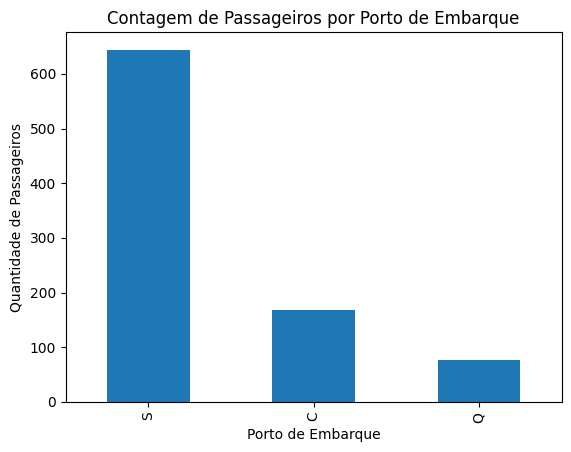

In [ ]:
contagem_embarked = dados['Embarked'].value_counts()

# Crie um gráfico de barras para visualizar a contagem
contagem_embarked.plot(kind='bar')

# Adicione rótulos e título ao gráfico
plt.xlabel('Porto de Embarque')
plt.ylabel('Quantidade de Passageiros')
plt.title('Contagem de Passageiros por Porto de Embarque')

# Exiba o gráfico
plt.show()

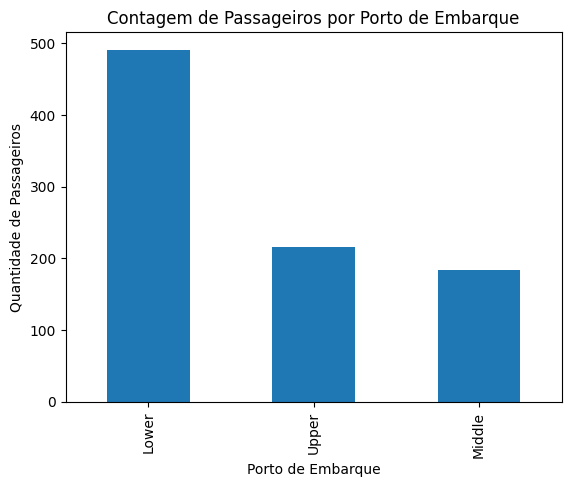

In [ ]:
contagem_embarked = dados['Pclass'].value_counts()

# Crie um gráfico de barras para visualizar a contagem
contagem_embarked.plot(kind='bar')

# Adicione rótulos e título ao gráfico
plt.xlabel('Porto de Embarque')
plt.ylabel('Quantidade de Passageiros')
plt.title('Contagem de Passageiros por Porto de Embarque')

# Exiba o gráfico
plt.show()

In [ ]:
dados['Embarked'].fillna("S", inplace=True)

In [ ]:
class_especial = dados.loc[((dados["Embarked"] == "S") & (dados["Pclass"]=="Lower"))].shape[0]
print(f"{class_especial}")
#possivelmente esse grupo são os trabalhadores do titanic

353


In [ ]:
print(dados.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
dtype: int64


In [ ]:
dados = pd.get_dummies(dados, columns=['Pclass', 'Embarked'])

In [ ]:
dados

,Survived,Sex,Age,Fare,Family,Pclass_Lower,Pclass_Middle,Pclass_Upper,Embarked_C,Embarked_Q,Embarked_S
0,0,0,22.0,7.2500,1,1,0,0,0,0,1
1,1,1,38.0,71.2833,1,0,0,1,1,0,0
2,1,1,26.0,7.9250,0,1,0,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1,0,0,1
4,0,0,35.0,8.0500,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,13.0000,0,0,1,0,0,0,1
887,1,1,19.0,30.0000,0,0,0,1,0,0,1
888,0,1,27.0,23.4500,3,1,0,0,0,0,1
889,1,0,26.0,30.0000,0,0,0,1,1,0,0


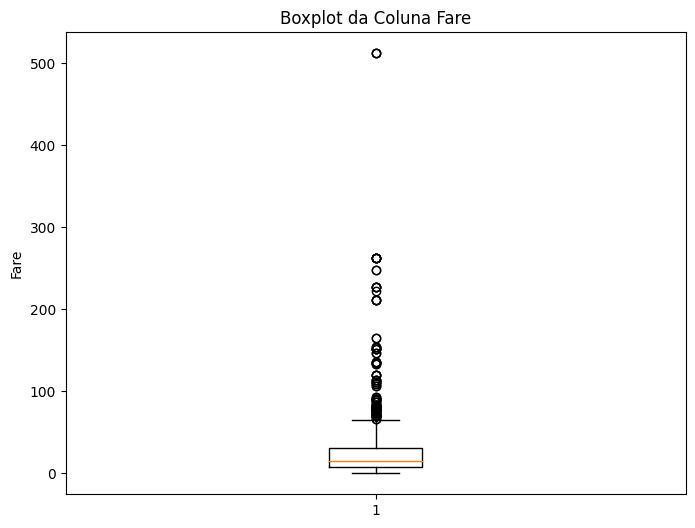

In [ ]:
plt.figure(figsize=(8, 6))  # Define o tamanho da figura

# Crie o boxplot da coluna 'Fare'
plt.boxplot(dados['Fare'])

# Adicione rótulos ao gráfico
plt.title('Boxplot da Coluna Fare')
plt.ylabel('Fare')

# Exiba o boxplot
plt.show()

In [ ]:
dados.loc[dados.Fare >100].Survived.value_counts()

1    39
0    14
Name: Survived, dtype: int64

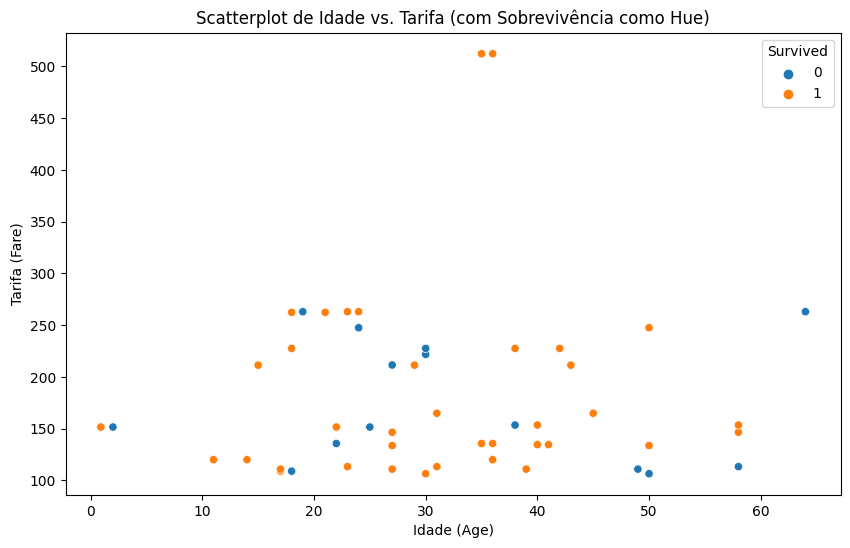

In [ ]:
dados_filtrados = dados.loc[dados['Fare'] > 100]

plt.figure(figsize=(10, 6))  # Define o tamanho da figura (opcional)

# Crie o scatterplot usando seaborn
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=dados_filtrados)

# Adicione rótulos aos eixos e título ao gráfico
plt.xlabel('Idade (Age)')
plt.ylabel('Tarifa (Fare)')
plt.title('Scatterplot de Idade vs. Tarifa (com Sobrevivência como Hue)')

# Exiba o gráfico
plt.show()

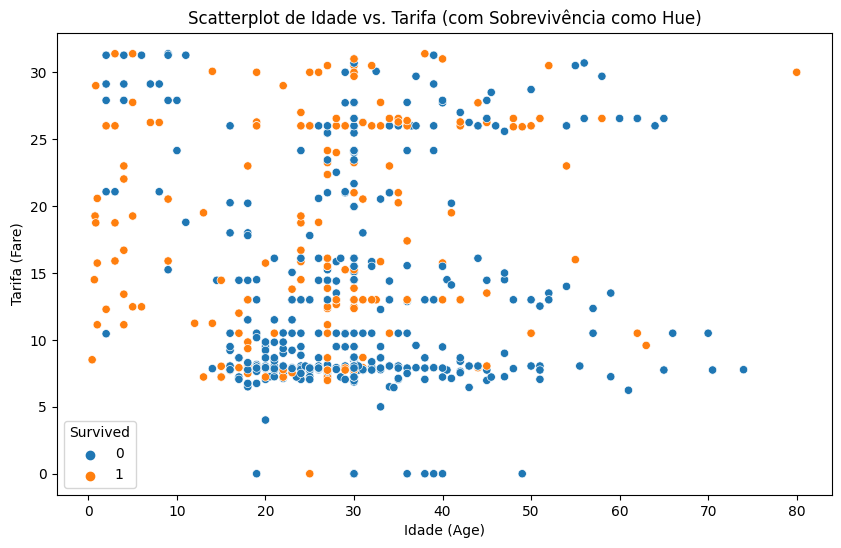

In [ ]:
dados_filtrados = dados.loc[dados["Fare"]<=dados['Fare'].mean()]

plt.figure(figsize=(10, 6))  # Define o tamanho da figura (opcional)

# Crie o scatterplot usando seaborn
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=dados_filtrados)

# Adicione rótulos aos eixos e título ao gráfico
plt.xlabel('Idade (Age)')
plt.ylabel('Tarifa (Fare)')
plt.title('Scatterplot de Idade vs. Tarifa (com Sobrevivência como Hue)')

# Exiba o gráfico
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = dados.iloc[:, 1:]  # Seleciona todas as colunas, exceto a primeira, para os recursos
Y = dados["Survived"]  # A variável de destino

# Divida os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=14041912)

# Crie uma instância do DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=14041912)  # Você pode ajustar hiperparâmetros, se necessário

# Treine o modelo usando o conjunto de treinamento
clf.fit(X_train, Y_train)

# Faça previsões no conjunto de teste
Y_pred = clf.predict(X_test)

# Avalie o desempenho do modelo (por exemplo, usando a acurácia)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')


Acurácia do modelo: 0.74


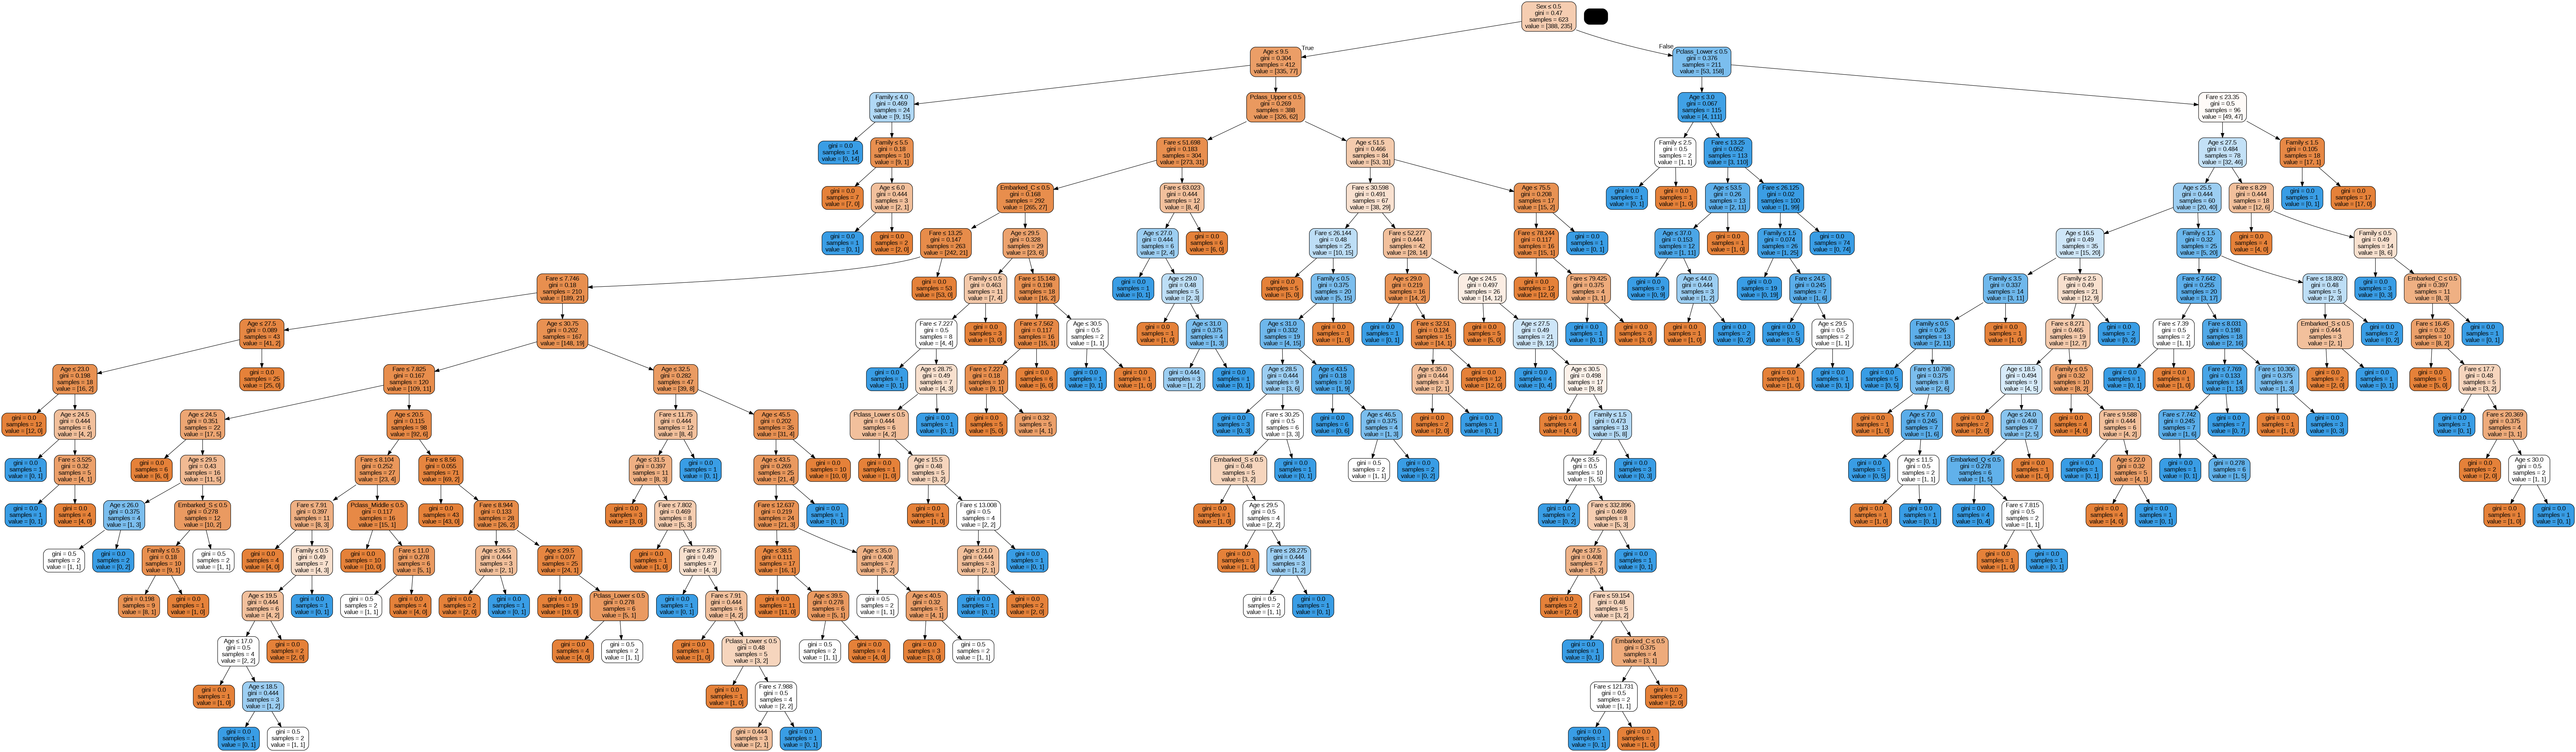

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

nomes_caracteristicas = X.columns.tolist()

# Exporte a árvore de decisão para um arquivo .dot com os nomes das características
dot_data = export_graphviz(clf, out_file=None,
                           filled=True, rounded=True,
                           special_characters=True,
                           feature_names=nomes_caracteristicas)


# Converta o arquivo .dot para um gráfico
graph = pydotplus.graph_from_dot_data(dot_data)

# Exiba a imagem da árvore de decisão (pode ser aberta no seu visualizador de imagem padrão)
Image(graph.create_png())

In [ ]:


for i in range (2,10):
    # Divida os dados em conjunto de treinamento e conjunto de teste
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=14041912)

    # Crie uma instância do DecisionTreeClassifier
    clf = DecisionTreeClassifier(max_depth = i , random_state=14041912)  # Você pode ajustar hiperparâmetros, se necessário

    # Treine o modelo usando o conjunto de treinamento
    clf.fit(X_train, Y_train)

    # Faça previsões no conjunto de teste
    Y_pred = clf.predict(X_test)

    # Avalie o desempenho do modelo (por exemplo, usando a acurácia)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f'Acurácia do modelo pra profundidade {i} é: {accuracy:.2f}')


Acurácia do modelo pra profundidade 2 é: 0.77
Acurácia do modelo pra profundidade 3 é: 0.80
Acurácia do modelo pra profundidade 4 é: 0.81
Acurácia do modelo pra profundidade 5 é: 0.78
Acurácia do modelo pra profundidade 6 é: 0.78
Acurácia do modelo pra profundidade 7 é: 0.75
Acurácia do modelo pra profundidade 8 é: 0.77
Acurácia do modelo pra profundidade 9 é: 0.76


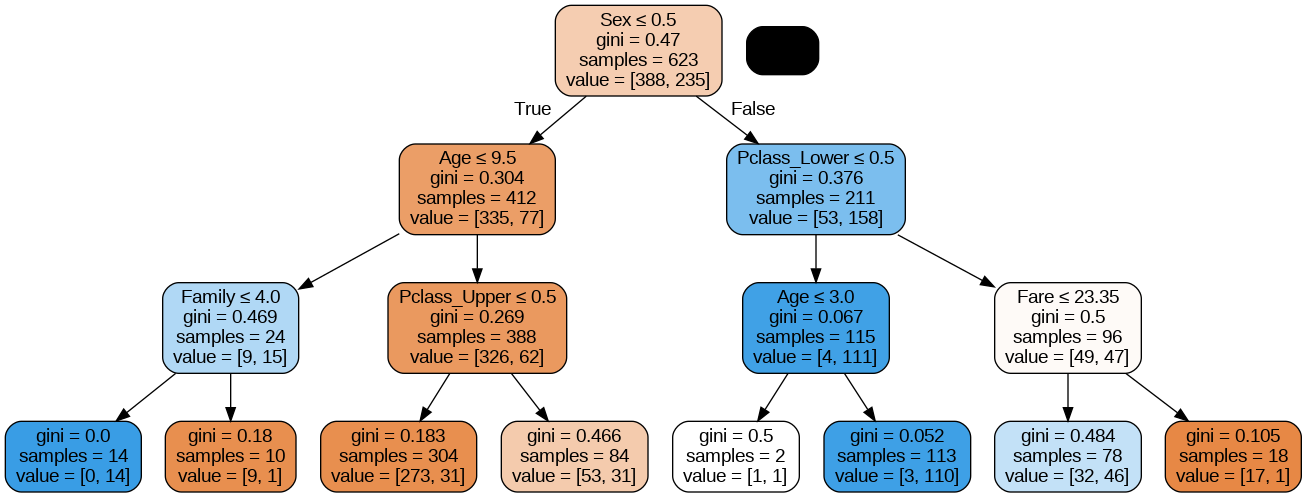

In [ ]:
# Divida os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=14041912)
# Crie uma instância do DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3 , random_state=14041912)  # Você pode ajustar hiperparâmetros, se necessário

# Treine o modelo usando o conjunto de treinamento
clf.fit(X_train, Y_train)
# Faça previsões no conjunto de teste
Y_pred = clf.predict(X_test)

dot_data = export_graphviz(clf, out_file=None,
                           filled=True, rounded=True,
                           special_characters=True,
                           feature_names=nomes_caracteristicas)


# Converta o arquivo .dot para um gráfico
graph = pydotplus.graph_from_dot_data(dot_data)

# Exiba a imagem da árvore de decisão (pode ser aberta no seu visualizador de imagem padrão)
Image(graph.create_png())

In [ ]:
# Crie uma instância do DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 4 , random_state=14041912 , criterion = "gini")  # Você pode ajustar hiperparâmetros, se necessário

# Treine o modelo usando o conjunto de treinamento
clf.fit(X_train, Y_train)
# Faça previsões no conjunto de teste
Y_pred = clf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Acurácia do modelo pra profundidade {4} e gini é: {accuracy:.2f}')
clf = DecisionTreeClassifier(max_depth = 4 , random_state=14041912 , criterion = "entropy")  # Você pode ajustar hiperparâmetros, se necessário

# Treine o modelo usando o conjunto de treinamento
clf.fit(X_train, Y_train)
# Faça previsões no conjunto de teste
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Acurácia do modelo pra profundidade {4} e entropy é: {accuracy:.2f}')

Acurácia do modelo pra profundidade 4 e gini é: 0.81
Acurácia do modelo pra profundidade 4 e entropy é: 0.81


In [ ]:
from sklearn.metrics import confusion_matrix

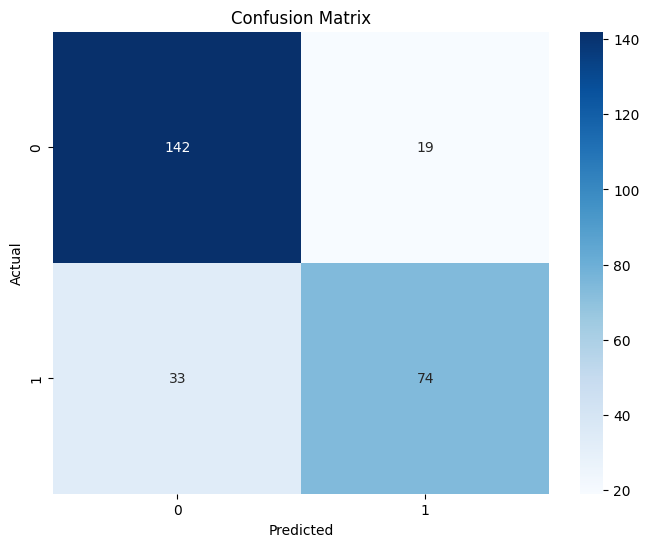

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Acurácia: 0.81


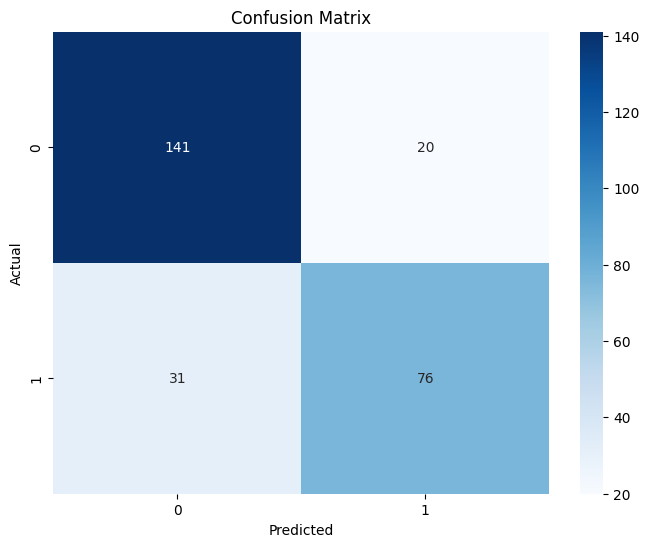

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(max_depth=4,n_estimators=50, random_state=14041912,criterion="entropy")  # Número de árvores é um hiperparâmetro chave

# Treine o modelo nos dados de treinamento
rf_classifier.fit(X_train, Y_train)
y_pred = rf_classifier.predict(X_test)

# Calcule a acurácia
accuracy = accuracy_score(Y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')



cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
#vamos agora varias o modelo retirando os outliers de Fare e e balanceado as categorias
dados["Fare"] = dados[dados['Fare'] <= 100]['Fare']

In [ ]:
from imblearn.over_sampling import SMOTE

# Criar uma instância do SMOTE
smote = SMOTE(random_state=14041912)

# Aplicar o SMOTE aos dados de treinamento (X_train, y_train)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)

# Crie uma instância do DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)  # Você pode ajustar hiperparâmetros, se necessário

# Treine o modelo usando o conjunto de treinamento
clf.fit(X_train_balanced, Y_train_balanced)

# Faça previsões no conjunto de teste
Y_pred = clf.predict(X_test)

# Avalie o desempenho do modelo (por exemplo, usando a acurácia)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')



Acurácia do modelo: 0.76


Acurácia: 0.81


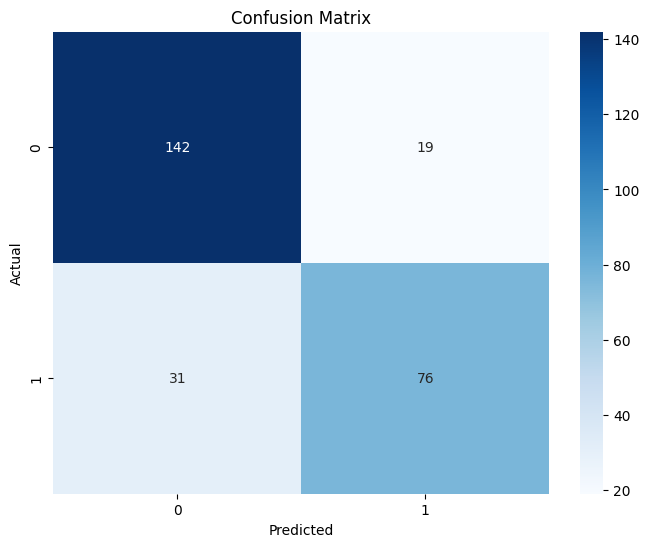

In [ ]:
rf_classifier = RandomForestClassifier(max_depth=4,n_estimators=10, random_state=14041912)  # Número de árvores é um hiperparâmetro chave

# Treine o modelo nos dados de treinamento
rf_classifier.fit(X_train, Y_train)
y_pred = rf_classifier.predict(X_test)

# Calcule a acurácia
accuracy = accuracy_score(Y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')



cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

